In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px

# Funcoes auxiliares
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Modelo hierarquico
from scipy.cluster.hierarchy import dendrogram, linkage

# Modelos de Aprendizado Nao-Supervisionado
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score,rand_score,adjusted_rand_score

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ImagineDogs/TranstornosMentais/main/dados/df_cid10.csv')
table = df[['cod_paciente','cid10_diagnostico', 'cid10_seg_diagnostico', 'cid10_faixa', 'cid10_faixa_alta', 'cid10_seg_faixa', 'cid10_seg_faixa_alta']].loc[~df['cid10_faixa'].isnull()]
table = table.fillna('Sem')

## Modelos para internações

In [3]:
encX = OneHotEncoder()

X = table[['cid10_diagnostico', 'cid10_seg_diagnostico']]
X = encX.fit_transform(X)
y1 = np.array(table['cid10_faixa_alta'])
y2 = np.array(table['cid10_seg_faixa_alta'])

In [4]:
dbscan = DBSCAN()

clusters = dbscan.fit_predict(X)

silhouette = silhouette_score(X, clusters)
rand = rand_score(y1, clusters)
adj_rand = adjusted_rand_score(y1, clusters)

# Imprimindo as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.8930008834905617
Índice Rand: 0.7620371231750308
Rand Corrigido: 0.14868541255647683


In [5]:

dbscan = DBSCAN()

clusters = dbscan.fit_predict(X)

silhouette = silhouette_score(X, clusters)
rand = rand_score(y2, clusters)
adj_rand = adjusted_rand_score(y2, clusters)

# Imprimindo as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.8930008834905617
Índice Rand: 0.5536266765921329
Rand Corrigido: 0.028472532877529922


In [6]:
n_clusters= 11

kmeans = KMeans(n_clusters=n_clusters)

# Ajuste o modelo K-Means aos dados X
clusters = kmeans.fit_predict(X)

# Calcule as métricas de avaliação
silhouette = silhouette_score(X, clusters)
rand = rand_score(y1, clusters)
adj_rand = adjusted_rand_score(y1, clusters)

# Imprima as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.4082260518681141
Índice Rand: 0.7348496029147084
Rand Corrigido: 0.16146499680976067


In [7]:
n_clusters= 11

kmeans = KMeans(n_clusters=n_clusters)

# Ajuste o modelo K-Means aos dados X
clusters = kmeans.fit_predict(X)

# Calcule as métricas de avaliação
silhouette = silhouette_score(X, clusters)
rand = rand_score(y2, clusters)
adj_rand = adjusted_rand_score(y2, clusters)

# Imprima as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.43885498556963887
Índice Rand: 0.5450098364652664
Rand Corrigido: 0.02092132146033483


In [8]:
# cid_alta = df.filter(regex=r'^cid10_.*_alta$').columns.tolist()
# print(cid_alta)

# descricao_alta = df.filter(regex=r'^descricao_.*_alta$').columns.tolist()
# print(descricao_alta)

# alta = cid_alta + descricao_alta
# df_alta = df[alta]

## Modelos para pacientes


In [9]:
df_group = df[['cod_paciente','cid10_diagnostico','cid10_diagnostico_alta']]
df_group = df_group.groupby('cod_paciente').agg('first')
df_group = df_group.fillna('Sem')
df_group

,cid10_diagnostico,cid10_diagnostico_alta
cod_paciente,,
39,Sem,F20
40,F14,F14
41,Sem,F14
42,Sem,F19
43,F19,F19
...,...,...
11064,F19,F19
11065,F32,F33
11070,F32,F32


In [10]:
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df_group)

In [11]:
silhuetas = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(df_encoded)
    silhouette = silhouette_score(df_encoded, clusters)
    silhuetas.append(silhouette)

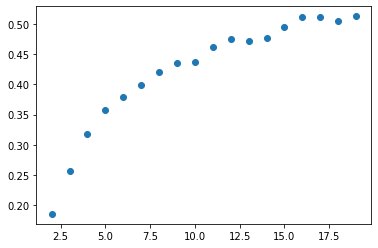

In [12]:
plt.scatter(range(2, 20), silhuetas)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_encoded)
silhouette = silhouette_score(df_encoded, clusters)
round(silhouette,2)

0.36

In [14]:
df_plot = df[['cod_paciente','cid10_faixa', 'cid10_faixa_alta']]
df_plot = df_plot.groupby('cod_paciente').agg('first')
df_plot = df_plot.fillna('Sem')
df_plot['grupo'] = clusters

In [15]:
df_plot

,cid10_faixa,cid10_faixa_alta,grupo
cod_paciente,,,
39,Sem,F20-F29,3
40,F10-F19,F10-F19,0
41,Sem,F10-F19,0
42,Sem,F10-F19,2
43,F10-F19,F10-F19,2
...,...,...,...
11064,F10-F19,F10-F19,2
11065,F30-F39,F30-F39,0
11070,F30-F39,F30-F39,0


In [16]:
df_counts = df_plot[['cid10_faixa','cid10_faixa_alta','grupo']].value_counts().reset_index().rename({0:'Contagem'},axis=1)
df_counts

,cid10_faixa,cid10_faixa_alta,grupo,Contagem
0,F10-F19,F10-F19,2,1050
1,F20-F29,F20-F29,3,643
2,F10-F19,F10-F19,4,447
3,F30-F39,F30-F39,1,407
4,F30-F39,F30-F39,0,386
...,...,...,...,...
147,F90-F98,F30-F39,1,1
148,F10-F19,Sem,2,1
149,F40-F49,F30-F39,1,1
150,F10-F19,F40-F49,4,1


In [17]:
fig = px.scatter(df_counts, x='cid10_faixa', y='cid10_faixa_alta', color='Contagem', symbol='grupo')
fig.update_traces(marker_size=10)
fig.update_layout(coloraxis=dict(cmax=400, cmin=0))
fig.update_layout(coloraxis_colorbar_x=-0.20)
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(categoryorder='category ascending')
fig.show()

## Agrupamento hierárquico

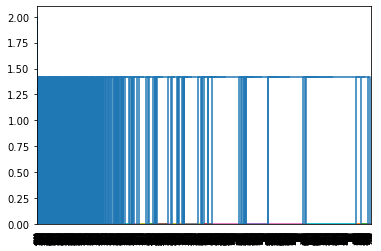

In [19]:
linkage_data = linkage(df_encoded.todense(), method='single', metric='euclidean')
dendrogram(linkage_data)

plt.show()

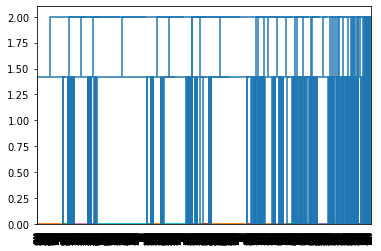

In [20]:
linkage_data = linkage(df_encoded.todense(), method='complete', metric='euclidean')
dendrogram(linkage_data)

plt.show()

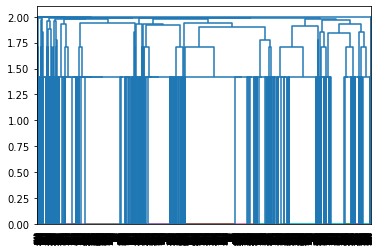

In [21]:
linkage_data = linkage(df_encoded.todense(), method='weighted', metric='euclidean')
dendrogram(linkage_data)

plt.show()

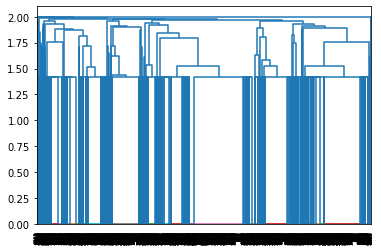

In [22]:
linkage_data = linkage(df_encoded.todense(), method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [23]:
linkage_data = linkage(df_encoded.todense(), method='median', metric='euclidean')
dendrogram(linkage_data)

plt.show()

KeyboardInterrupt: 

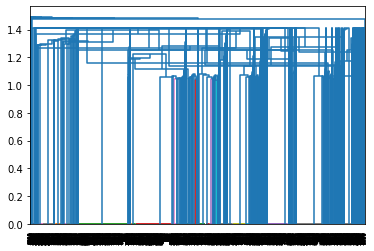

In [ ]:
linkage_data = linkage(df_encoded.todense(), method='centroid', metric='euclidean')
dendrogram(linkage_data)

plt.show()

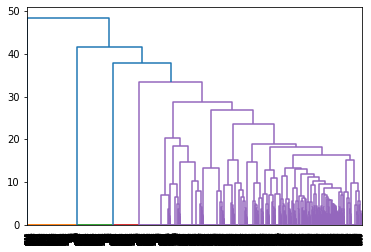

In [ ]:
linkage_data = linkage(df_encoded.todense(), method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

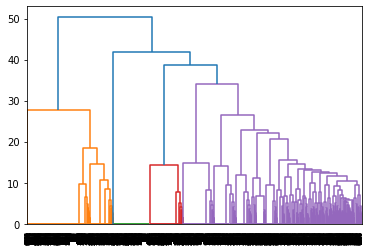

In [24]:
df_group = df[['cod_paciente','cid10_diagnostico','cid10_diagnostico_alta']]
df_group = df_group.groupby('cod_paciente').agg('last')
df_group = df_group.fillna('Sem')

encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df_group)

linkage_data = linkage(df_encoded.todense(), method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [36]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_encoded.todense())

df_plot = df[['cod_paciente','cid10_faixa', 'cid10_faixa_alta']]
df_plot = df_plot.groupby('cod_paciente').agg('first')
df_plot = df_plot.fillna('Sem')
df_plot['grupo'] = labels

In [37]:
df_counts = df_plot[['cid10_faixa','cid10_faixa_alta','grupo']].value_counts().reset_index().rename({0:'Contagem'},axis=1)
df_counts

,cid10_faixa,cid10_faixa_alta,grupo,Contagem
0,F10-F19,F10-F19,1,938
1,F30-F39,F30-F39,0,777
2,F10-F19,F10-F19,0,675
3,F20-F29,F20-F29,2,467
4,F20-F29,F20-F29,0,256
...,...,...,...,...
142,F90-F98,F01-F09,0,1
143,F90-F98,F10-F19,0,1
144,F60-F69,F20-F29,2,1
145,F20-F29,F99-F99,2,1


In [38]:
fig = px.scatter(df_counts, x='cid10_faixa', y='cid10_faixa_alta', color='Contagem', symbol='grupo')
fig.update_traces(marker_size=10)
fig.update_layout(coloraxis=dict(cmax=400, cmin=0))
fig.update_layout(coloraxis_colorbar_x=-0.20)
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(categoryorder='category ascending')
fig.show()